# 统计学：检验心理学现象

#### 背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

In [1]:
import pandas as pd
stroop = pd.read_csv('Documents/keepLearning/Udacity/dataAnalysis/1-Intro/Stroop/stroopdata.csv')
stroop.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


调查问题

(1) 我们的自变量是什么？因变量是什么？

- 自变量：文字和油墨颜色的一致性。
- 因变量：说出墨色名称的时间。

In [2]:
stroop.shape

(24, 2)

#### (2)此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

- 零假设：针对一致文字条件和不一致文字条件的列表，说出对应墨色的平均时间相同。即：$\mu_{con} = \mu_{incon}$
- 对立假设：针对一致文字条件说出对应墨色的平均时间要比不一致文字条件的列表说出对应墨色的平均时间少。即：$\mu_{con} > \mu_{incon}$

此处的$\mu$代表均值。**<font color=royalblue> -update 20180109 添加说明$\mu$的含义。</font>**

- 选择的统计测试：选用配对t test。
- 选择配对t test的原因：
    - 总体均值和标准差未知，适合使用t检验。
    - 样本通过重复的实验获取到了不同的数据集，各次实验之间是独立的；但由于是同一任务在不同条件下的实验结果，两组实验结果具有一定的相关性，所以选择配对t test。**<font color=royalblue> -update 20180109 修改选择配对t test原因</font>**
    - 总体样本量小于30，适合使用t检验。

#### (3)报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。
**集中趋势测量**
1. 均值：
    - 一致文字条件下：$\overline{x}_{con} = 14.051125$
    - 不一致文字条件下：$\overline{x}_{incon} = 22.015917$
2. 中位数：
    - 一致文字条件下：$median_{con} = 14.3565$
    - 不一致文字条件下：$median_{incon} = 21.0175$

In [3]:
stroop.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [4]:
stroop.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

**变异测量**
1. 范围：
    - 一致文字条件下：$ range_{con} = 13.698$
    - 不一致文字条件下：$ range_{incon} = 19.568$
2. IQR：
    - 一致文字条件下：$ IQR_{con} = 4.30550$
    - 不一致文字条件下：$ IQR_{incon} = 5.33475$
3. 样本标准差
    - 一致文字条件下：$ SD_{con} = 3.559358$
    - 不一致文字条件下：$ SD_{incon} = 4.797057$
        **<font color=royalblue>-update 20180109 修改标准差英文为SD</font>**

In [5]:
stroop.max()-stroop.min()

Congruent      13.698
Incongruent    19.568
dtype: float64

In [6]:
stroop.quantile(0.75)-stroop.quantile(0.25)

Congruent      4.30550
Incongruent    5.33475
dtype: float64

In [7]:
stroop.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

#### (4)提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

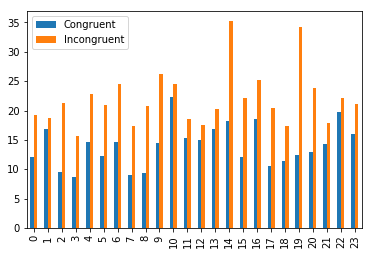

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
stroop.plot(kind = "bar")

- 柱状图：可以看出不一致文字条件下说出墨色的时间都比一致文字条件下说出墨色的时间长。

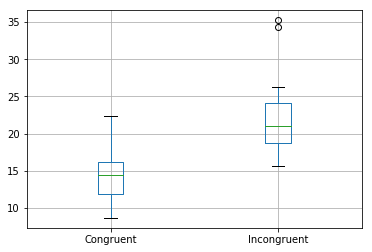

In [9]:
stroop.boxplot()

- 箱线图：可以看出不一致文字条件和一致文字条件下，说出墨色的时间分布图。并且可以发现，不一致文字条件下有两个异常点，猜想可能对于不一致文字条件下说出墨色的时间相对不同个体有一定差异，即某些个体可能在说出不一致文字条件下的墨色有较大困难，所花费时间明显较长。

#### (5)现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [10]:
from scipy.stats import ttest_rel
ttest_rel(stroop['Congruent'],stroop['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

#### 结论：假设显著性水平是0.05，关键统计值为p=4.1030005857111781e-08。在 0.05 的显著性水平下，p值小于0.05，可以看出不一致文字条件和一致文字条件下，说出墨色的时间差异非常显著。与期望一致，成功拒绝零假设。

**<font color=royalblue>-update 20180109 修改t test的函数为ttest_rel，并计算得到结果。</font>**


1. 置信水平和显著性水平
    - 置信区间：置信区间是从样本统计量派生的值范围，可能包含未知总体参数的值。
    - 置信水平($1-\alpha$)：变量落在置信区间的可能性。
    - 显著性水平($\alpha$)：变量落在置信区间之外的可能性。
2. 自由度
    - 自由度(DF)是数据提供的信息量，可以使用这些信息来估计未知总体参数的值并计算这些估计值的变异性。自由度值由样本中的观测值个数和模型中的参数个数确定。本项目使用的是配对t检验，自由度为n-1 = 24 - 1 = 23。
3. t临界值
    - 临界值是在原假设下，检验统计量在分布图上的点，这些点定义一组要求否定原假设的值。这组值称为临界或否定区域。

<font color=darkgreen>**-update 20180503 明确置信水平、显著性水平、自由度、t临界值等概念，并使用正确的表述。**</font>

参考文献：

[知乎专栏：Udacity 数据分析入门—Stroop Task](https://zhuanlan.zhihu.com/p/26617385)

[T检验-MBA智库](http://wiki.mbalib.com/wiki/T检验)

[Doc:scipy.stats.ttest_rel¶](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)

[t检验的类型-Minitab](http://support.minitab.com/zh-cn/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/types-of-t-tests/)

[Intro to Inferential Statistics - Udacity](https://classroom.udacity.com/courses/ud201)

[在统计中自由度是什么？](http://blog.sina.com.cn/s/blog_839b4f640102wi1k.html)

[什么是临界值-Minitab](https://support.minitab.com/zh-cn/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/what-is-a-critical-value/)